GetDist iPython Plot Gallery
===============

In [1]:
#Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
from __future__ import print_function
import sys
sys.path.insert(0,r'c:\work\dist\git\getdist')
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

GetDist Version: 0.2.7, Matplotlib version: 2.0.0


In [2]:
#Get some random samples for demonstration:
#make random covariance, then independent samples from Gaussian
import numpy as np
ndim = 4
nsamp = 10000
np.random.seed(10)
A = np.random.rand(ndim,ndim)
cov = np.dot(A, A.T)
samps = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)
A = np.random.rand(ndim,ndim)
cov = np.dot(A, A.T)
samps2 = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)

In [3]:
#Get the getdist MCSamples objects for the samples, specifying same parameter
#names and labels; if not specified weights are assumed to all be unity
names = ["x%s"%i for i in range(ndim)]
labels =  ["x_%s"%i for i in range(ndim)]
samples = MCSamples(samples=samps,names = names, labels = labels)
samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')

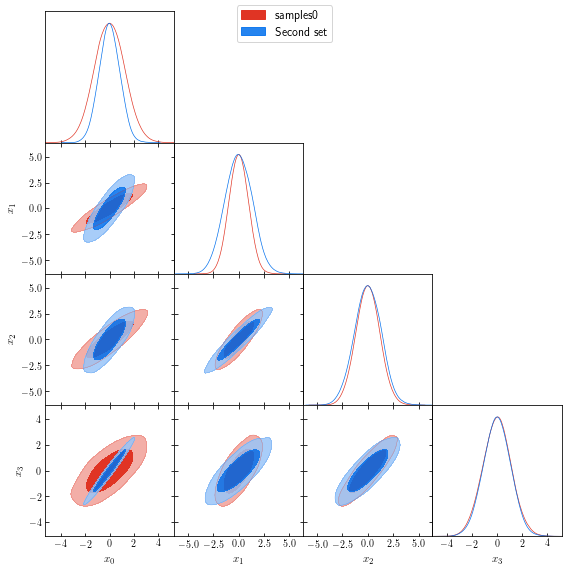

In [4]:
#Triangle plot
g = plots.getSubplotPlotter()
g.triangle_plot([samples, samples2], filled=True)


In [5]:
#Here we are using inline plots, but if you wanted to export to file you'd just do e.g.
#g.export('output_file.pdf')

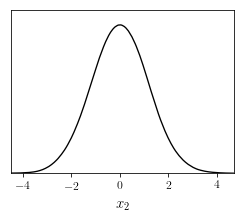

In [6]:
#1D marginalized plot
g = plots.getSinglePlotter(width_inch=4)
g.plot_1d(samples, 'x2')


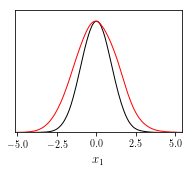

In [7]:
#1D marginalized comparison plot
g = plots.getSinglePlotter(width_inch=3)
g.plot_1d([samples, samples2], 'x1')

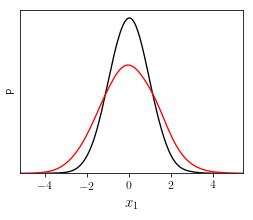

In [8]:
#1D normalized comparison plot
g = plots.getSinglePlotter(width_inch=4)
g.plot_1d([samples, samples2], 'x1', normalized=True)

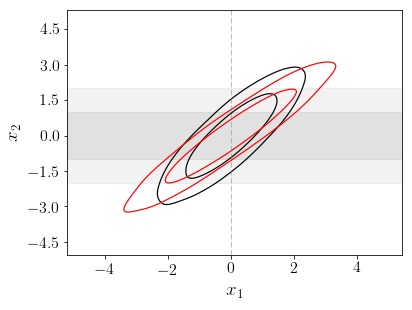

In [9]:
 #2D line contour comparison plot with extra bands and markers
 g = plots.getSinglePlotter()
 g.plot_2d([samples, samples2], 'x1', 'x2')
 g.add_x_marker(0)
 g.add_y_bands(0, 1)

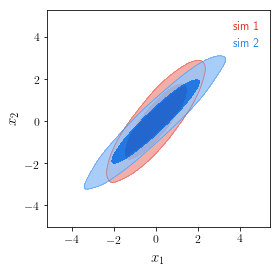

In [10]:
#Filled 2D comparison plot with legend
g = plots.getSinglePlotter(width_inch=4, ratio=1)
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True)
g.add_legend(['sim 1', 'sim 2'], colored_text=True);

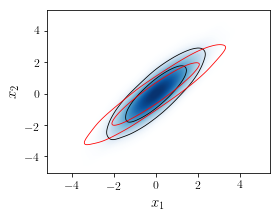

In [11]:
#Shaded 2D comparison plot
g = plots.getSinglePlotter(width_inch=4)
g.plot_2d([samples, samples2], 'x1', 'x2', shaded=True);

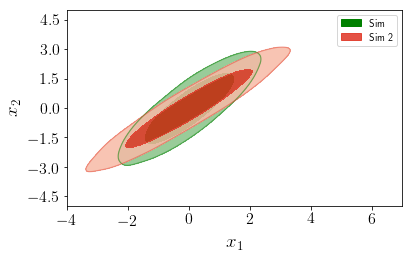

In [12]:
#Customized 2D filled comparison plot
g = plots.getSinglePlotter(width_inch=6, ratio=3 / 5.)
g.settings.legend_fontsize = 10
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True, 
    colors=['green', ('#F7BAA6', '#E03424')], lims=[-4, 7, -5, 5])
g.add_legend(['Sim ', 'Sim 2'], legend_loc='upper right');

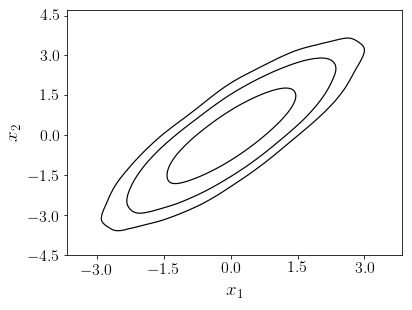

In [13]:
 #Change the contours levels for marge stats and plots
 #(note you need a lot of samples for 99% confidence contours to be accurate)
 g = plots.getSinglePlotter()
 samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
 g.settings.num_plot_contours = 3
 g.plot_2d(samples, 'x1', 'x2');

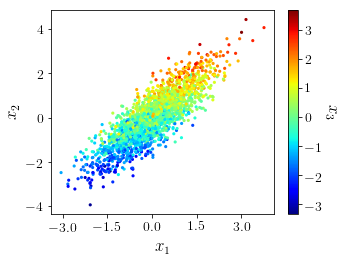

In [14]:
#2D scatter (3D) plot
g = plots.getSinglePlotter(width_inch=5)
g.plot_3d(samples, ['x1', 'x2', 'x3'])

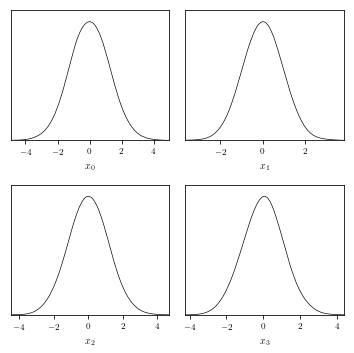

In [15]:
#Multiple 1D subplots
g = plots.getSubplotPlotter(width_inch=5)
g.settings.axes_fontsize = 9
g.settings.legend_fontsize = 10
g.plots_1d(samples, ['x0', 'x1', 'x2', 'x3'], nx=2);

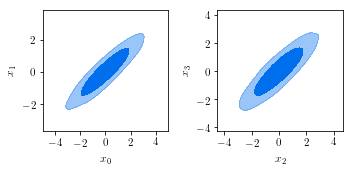

In [16]:
#Multiple 2D subplots
g = plots.getSubplotPlotter(subplot_size=2.5)
g.plots_2d(samples, param_pairs=[['x0', 'x1'], ['x2', 'x3']], 
           nx=2, filled=True);

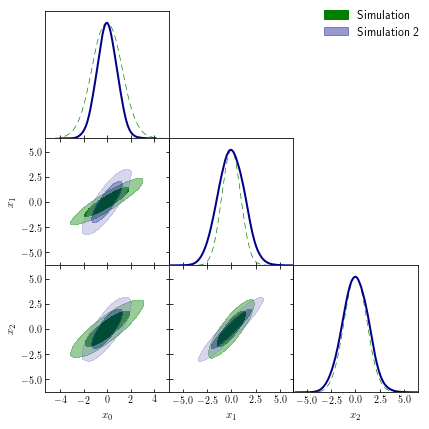

In [17]:
#Customized triangle plot
g = plots.getSubplotPlotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.triangle_plot([samples, samples2], ['x0', 'x1', 'x2'], 
    filled_compare=True, 
    legend_labels=['Simulation', 'Simulation 2'], 
    legend_loc='upper right', 
    line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}], 
    contour_colors=['green','darkblue'])

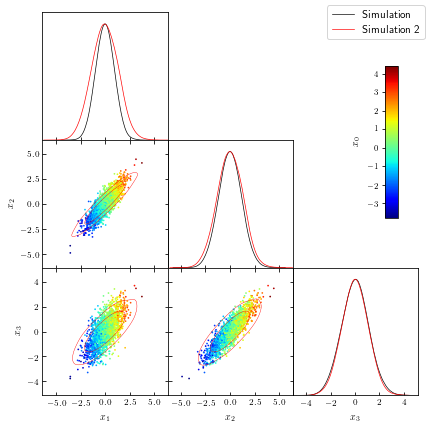

In [18]:
#3D (scatter) triangle plot
g = plots.getSubplotPlotter(width_inch=6)
g.settings.axes_fontsize = 9
g.settings.legend_fontsize = 11
g.triangle_plot([samples, samples2], ['x1', 'x2', 'x3'], 
                plot_3d_with_param='x0', 
                legend_labels=['Simulation', 'Simulation 2'])

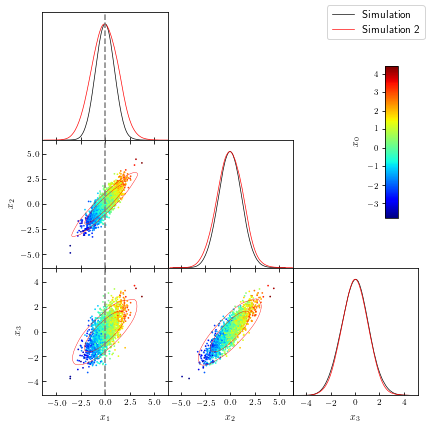

In [19]:
#You can reference g.subplots for manual tweaking, 
#e.g. let's add a vertical axis line in the first column 
for ax in g.subplots[:,0]:
    ax.axvline(0, color='gray', ls='--')
IPython.display.display(g.fig)

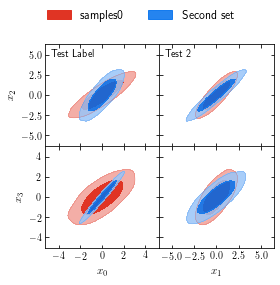

In [20]:
#Rectangle 2D comparison plots
g = plots.getSubplotPlotter()
g.settings.figure_legend_frame = False
g.rectangle_plot(['x0', 'x1'], ['x2', 'x3'], 
    roots=[samples, samples2], filled=True, 
    plot_texts=[['Test Label', None], ['Test 2', None]]);

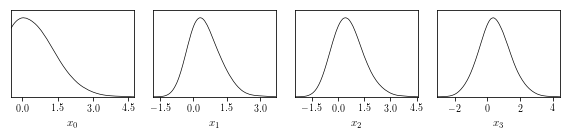

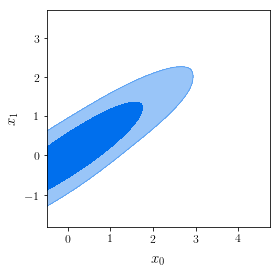

In [21]:
#Example of how to handle boundaries (samples are restricted to x0 >-0.5)
cut_samps = samps[samps[:,0]>-0.5,:]
cut_samples = MCSamples(samples=cut_samps, names = names, labels = labels, 
                        ranges={'x0':(-0.5, None)})
g = plots.getSubplotPlotter()
g.plots_1d(cut_samples,nx=4);
g = plots.getSinglePlotter(width_inch=4, ratio=1)
g.plot_2d(cut_samples, 'x0', 'x1', filled=True);

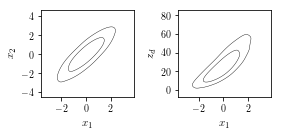

In [22]:
#Add and plot a new derived parameter
#getParms gets p so that p.x0, p.x1.. are numpy vectors of sample values
p = samples.getParams() 
samples.addDerived((5+p.x2)** 2, name='z', label='z_d')
g = plots.getSubplotPlotter()
g.plots_2d(samples,'x1',['x2','z'], nx=2);

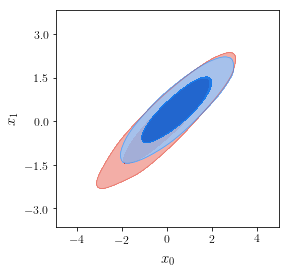

In [23]:
#Example of how to do importance sampling, modifying the samples by re-weighting by a new likelihood
#e.g. to modify samples to be from the original distribution times a Gaussian in x1 (centered on 1, with sigma=1.2)
import copy
new_samples = copy.deepcopy(samples) #make a copy so don't change the original
p=samples.getParams()
new_loglike = (p.x1-1)**2/1.2**2/2
new_samples.loglikes = np.zeros(samples.numrows) #code currently assumes existing loglikes are set, set to zero here
new_samples.reweightAddingLogLikes(new_loglike) #re-weight cut_samples to account for the new likelihood
g = plots.getSinglePlotter(width_inch=4, ratio=1)
g.plot_2d([samples,new_samples], 'x0', 'x1', filled=True);

In [24]:
#Many other things you can do besides plot, e.g. get latex
print(cut_samples.getInlineLatex('x0',limit=2))
print(samples.getInlineLatex('x0',limit=2))

x_0 < 2.31
x_0 = 0.0^{+2.5}_{-2.5}


In [25]:
print(samples.getInlineLatex('x1',limit=1))

x_1 = 0.00\pm 0.96


In [26]:
print(samples.getTable().tableTex())

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$x_0            $} & $0.0^{+2.5}_{-2.5}         $\\

{\boldmath$x_1            $} & $0.0^{+1.9}_{-1.9}         $\\

{\boldmath$x_2            $} & $0.0^{+2.3}_{-2.3}         $\\

{\boldmath$x_3            $} & $0.0^{+2.2}_{-2.2}         $\\

$z_d                       $ & $26^{+20}_{-20}            $\\
\hline
\end{tabular}


In [27]:
print(samples.PCA(['x1','x2']))

PCA for parameters:
         2 :x_1
         3 :x_2

Correlation matrix for reduced parameters
          x1 :  1.0000  0.8487
          x2 :  0.8487  1.0000

e-values of correlation matrix
PC 1:   0.1513
PC 2:   1.8487

e-vectors
  2: -0.7071  0.7071
  3:  0.7071  0.7071

Principle components
PC1 (e-value: 0.151292)
[-1.179318]   (x_1-0.004343)/-0.813139)
[1.179318]   (x_2-0.000594)/1.000000)
          = 0.000000 +- 0.648716

PC2 (e-value: 1.848708)
[0.958949]   (x_1-0.004343)/1.000000)
[0.958949]   (x_2-0.000594)/1.229803)
          = 0.000000 +- 1.843932

Correlations of principle components
       1       2
PC 1   1.000   0.000
PC 2   0.000   1.000
   1  -0.077   0.921   (x_0)
   2  -0.275   0.961   (x_1)
   3   0.275   0.961   (x_2)
   4   0.353   0.807   (x_3)
   5   0.270   0.948   (z_d)



In [28]:
stats = cut_samples.getMargeStats()
lims0 = stats.parWithName('x0').limits
lims1 = stats.parWithName('x1').limits
for conf, lim0, lim1 in zip(samples.contours,lims0, lims1):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim0.lower, lim0.upper, lim0.limitType()))
    print('x1 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
       

x0 0.68% lower: -0.500 upper: 1.030 (one tail upper limit)
x1 0.68% lower: -0.307 upper: 1.082 (two tail)
x0 0.95% lower: -0.500 upper: 2.308 (one tail upper limit)
x1 0.95% lower: -0.807 upper: 1.946 (two tail)
x0 0.99% lower: -0.500 upper: 3.149 (one tail upper limit)
x1 0.99% lower: -1.034 upper: 2.671 (two tail)


In [29]:
#Save to file
import tempfile, os
tempdir = os.path.join(tempfile.gettempdir(),'testchaindir')
if not os.path.exists(tempdir): os.makedirs(tempdir)
rootname = os.path.join(tempdir, 'testchain')
samples.saveAsText(rootname)

In [30]:
#Load from file
from getdist import loadMCSamples
readsamps = loadMCSamples(rootname)

c:\users\antony~1\appdata\local\temp\testchaindir\testchain.txt
Removed no burn in


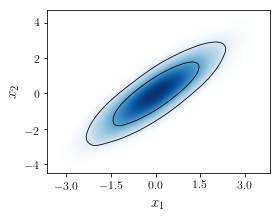

In [31]:
#Make plots from chain files, loading automatically as needed
g = plots.getSinglePlotter(chain_dir=tempdir, width_inch=4)
g.plot_2d('testchain', 'x1', 'x2', shaded=True);

c:\users\antony~1\appdata\local\temp\testchaindir\testchain.txt
Removed 0.2 as burn in


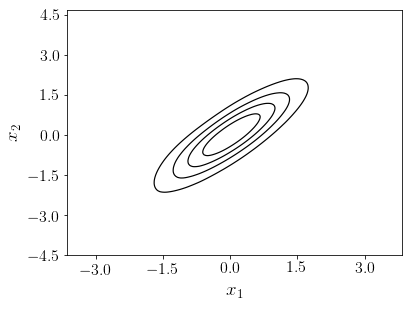

In [32]:
#Custom settings for all loaded chains can be set as follows;
#for example to use custom contours and remove the first 20% of each chain as burn in
g = plots.getSinglePlotter(chain_dir=tempdir, 
            analysis_settings={'ignore_rows': 0.2, 'contours':[0.2, 0.4, 0.6, 0.8]});
g.settings.num_plot_contours = 4
g.plot_2d('testchain', 'x1', 'x2', filled=False);


In [33]:
#Silence messages about load
getdist.chains.print_load_details = False

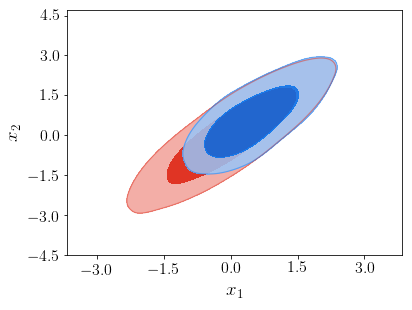

In [34]:
#Chains can be loaded by searching in multiple directories by giving a list as chain_dir
#(note chain names must be unique)

#make second test chain in new temp dir
temp2 = os.path.join(tempdir,'chaindir2')
cut_samples.saveAsText(os.path.join(temp2, 'testchain2'), make_dirs=True)
#Plot from chain files
g = plots.getSinglePlotter(chain_dir=[tempdir, temp2])
g.plot_2d(['testchain','testchain2'], 'x1', 'x2', filled=True);

In [35]:
#cleanup test files
import shutil
shutil.rmtree(tempdir)

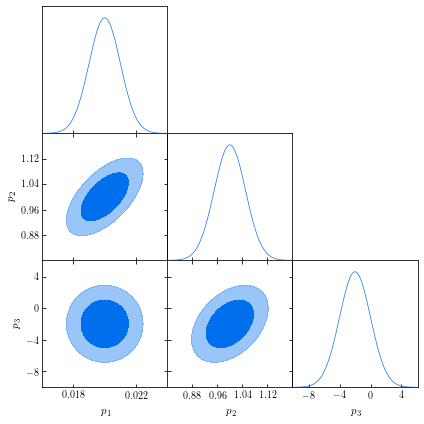

In [36]:
#The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
covariance = [[0.001**2, 0.0006*0.05, 0], [0.0006*0.05, 0.05**2, 0.2**2], [0, 0.2**2, 2**2]]
mean = [0.02, 1, -2] 
gauss=GaussianND(mean, covariance)
g = plots.getSubplotPlotter()
g.triangle_plot(gauss, filled=True)


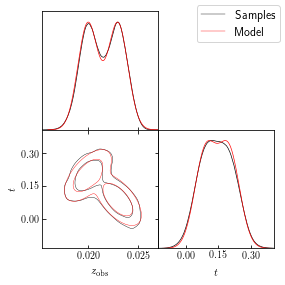

In [37]:
#You can also explicitly name parameters so Gaussian mixtures can be plotted in combination with samples
from getdist.gaussian_mixtures import Mixture2D
cov1 = [[0.001**2, 0.0006*0.05], [0.0006*0.05, 0.05**2]]
cov2 = [[0.001**2, -0.0006*0.05], [-0.0006*0.05, 0.05**2]]
mean1 = [0.02, 0.2]
mean2 = [0.023, 0.09]
mixture=Mixture2D([mean1, mean2], [cov1, cov2], names=['zobs','t'], labels=[r'z_{\rm obs}', 't'], label='Model')

#Generate samples from the mixture as simple example
samples = mixture.MCSamples(3000, label='Samples')

g = plots.getSubplotPlotter()
#compare the analytic mixture to the sample density
g.triangle_plot([samples, mixture], filled=False)


See the full [documentation](http://getdist.readthedocs.org/en/latest/index.html) for further details and examples